In [48]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
from citipy import citipy
from config import weather_api_key
from datetime import datetime
import requests
import time
from scipy.stats import linregress

In [49]:
# Create a set of latitude and longitude pairs
lats = np.random.uniform(low = -90.000, high=90.000, size=10)
longs = np.random.uniform(low = -180.000, high=180.000, size=10)
lats_longs = zip(lats, longs)
lats_longs

In [50]:
coordinates = list(lats_longs)

In [51]:
# Create a list of city names
cities = []

# Loop thru coordinates and get city names
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    if city not in cities:
        cities.append(city)

# Get the length of the cities array to verify enough unique cities selected
print(len(cities))

10


In [52]:
# Prep to gather weather data
city_data = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print("Beginning Data Retrieval     ")
print("-----------------------------")

set_count = 1
record_count = 1

# Loop thru cities
# for i in range(len(cities)):
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    city_url = url + "&q=" + city.replace(" ","+")

    print(f"Processing record {record_count} | {city_url} of Set {set_count} | {city}")
    record_count += 1

    try:
        # Parse JSON
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Get date and convert to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city.title(),
            "Lat": city_lat,
            "Lng": city_long,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_data})
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete     ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing record 1 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d4cdcba967ce53aae8c4db47fd6b052&q=san+francisco of Set 1 | san francisco
Processing record 2 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d4cdcba967ce53aae8c4db47fd6b052&q=hilo of Set 1 | hilo
Processing record 3 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d4cdcba967ce53aae8c4db47fd6b052&q=mataura of Set 1 | mataura
Processing record 4 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d4cdcba967ce53aae8c4db47fd6b052&q=busselton of Set 1 | busselton
Processing record 5 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d4cdcba967ce53aae8c4db47fd6b052&q=qaanaaq of Set 1 | qaanaaq
Processing record 6 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d4cdcba967ce53aae8c4db47fd6b052&q=yellowknife of Set 1 | yellowknife
Processing

In [53]:
len(city_data)

10

In [54]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Francisco,37.7749,-122.4194,98.56,73,20,3.00,US,"[{'City': 'San Francisco', 'Lat': 37.7749, 'Ln..."
1,Hilo,19.7297,-155.0900,82.80,72,1,9.22,US,"[{'City': 'San Francisco', 'Lat': 37.7749, 'Ln..."
2,Mataura,-46.1927,168.8643,49.48,86,100,3.56,NZ,"[{'City': 'San Francisco', 'Lat': 37.7749, 'Ln..."
3,Busselton,-33.6500,115.3333,56.05,63,100,7.05,AU,"[{'City': 'San Francisco', 'Lat': 37.7749, 'Ln..."
4,Qaanaaq,77.4840,-69.3632,30.43,83,86,4.34,GL,"[{'City': 'San Francisco', 'Lat': 37.7749, 'Ln..."


In [55]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [56]:
# Get relevant data for scatter plots
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

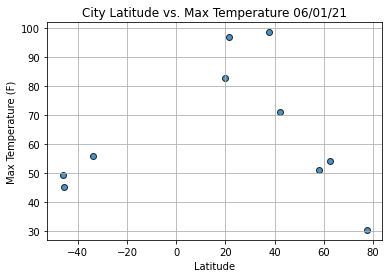

In [57]:
# Build scatter plot
plt.scatter(lats, max_temps, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save for future use
plt.savefig("Analysis/Fig1_Temperature_v_Latitude.png")
plt.show()

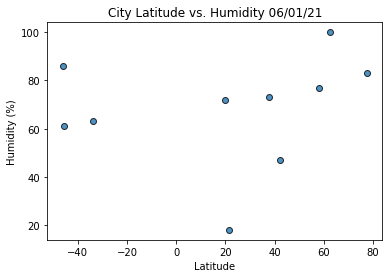

In [58]:
# Chart humidity vs. latitude
plt.scatter(lats, humidity, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.savefig("Analysis/Fig2_Humidity_v_Latitude")
plt.show()

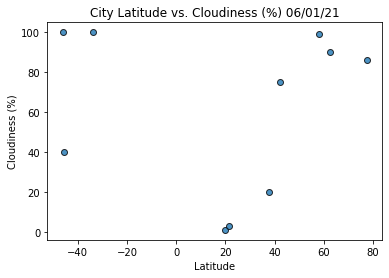

In [59]:
# Chart humidity vs. latitude
plt.scatter(lats, cloudiness, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.savefig("Analysis/Fig3_Cloudiness_v_Latitude")
plt.show()

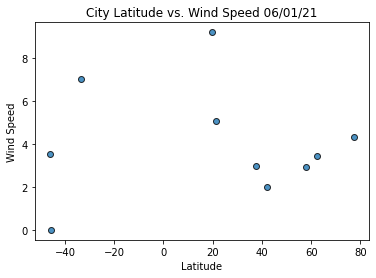

In [60]:
# Chart humidity vs. latitude
plt.scatter(lats, wind_speed, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.savefig("Analysis/Fig4_WindSpeed_v_Latitude")
plt.show()

In [61]:
# Create a function to run linear regressions
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")

    # Annotations
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [62]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Francisco,US,"[{'City': 'San Francisco', 'Lat': 37.7749, 'Ln...",37.7749,-122.4194,98.56,73,20,3.00
1,Hilo,US,"[{'City': 'San Francisco', 'Lat': 37.7749, 'Ln...",19.7297,-155.0900,82.80,72,1,9.22
4,Qaanaaq,GL,"[{'City': 'San Francisco', 'Lat': 37.7749, 'Ln...",77.4840,-69.3632,30.43,83,86,4.34
5,Yellowknife,CA,"[{'City': 'San Francisco', 'Lat': 37.7749, 'Ln...",62.4560,-114.3525,54.32,100,90,3.44
6,Mecca,SA,"[{'City': 'San Francisco', 'Lat': 37.7749, 'Ln...",21.4267,39.8261,96.85,18,3,5.10


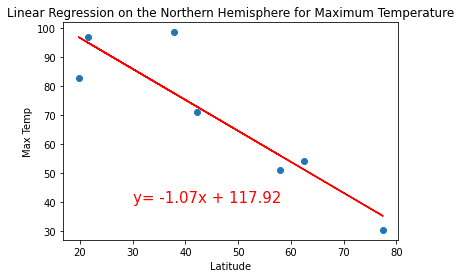

In [72]:
# Run Northern Hemisphere linear regression for Temperatures
# x_values = northern_hemi_df["Lat"] don't need, can use directly in the function call
# y_values = northern_hemi_df["Max Temp"] don't need, can use directly in the function call

# Call our function
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (30,40))

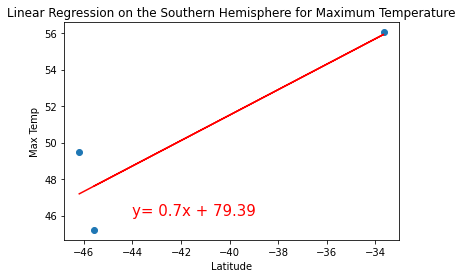

In [71]:
# Run Southern Hemisphere linear regression for Temperatures
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp", (-44,46))

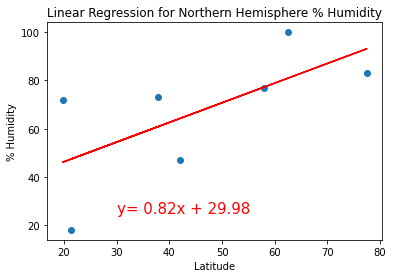

In [70]:
# Run Northern Hemisphere linear regression for Humidity
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Linear Regression for Northern Hemisphere % Humidity", "% Humidity", (30,25))

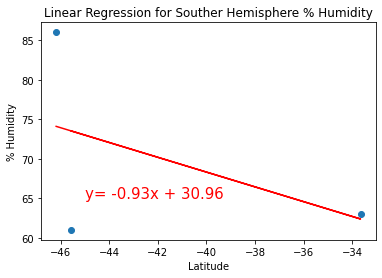

In [69]:
# Run Southern Hemisphere linear regression for Humidity
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Linear Regression for Souther Hemisphere % Humidity", "% Humidity", (-45,65))

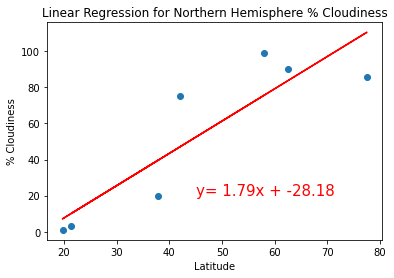

In [68]:
# Run Northern Hemisphere linear regression for Cloudiness
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Linear Regression for Northern Hemisphere % Cloudiness", "% Cloudiness", (45,20))

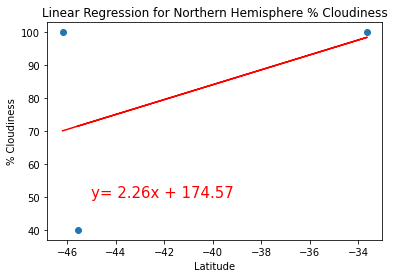

In [74]:
# Run Southern Hemisphere linear regression for Cloudiness
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Linear Regression for Northern Hemisphere % Cloudiness", "% Cloudiness", (-45,50))

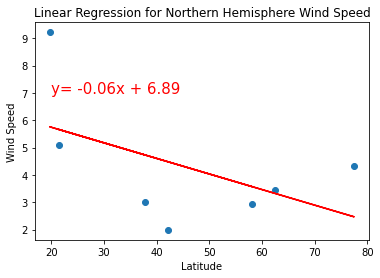

In [76]:
# Run Northern Hemisphere linear regression for Wind Speed
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Linear Regression for Northern Hemisphere Wind Speed", "Wind Speed", (20,7))

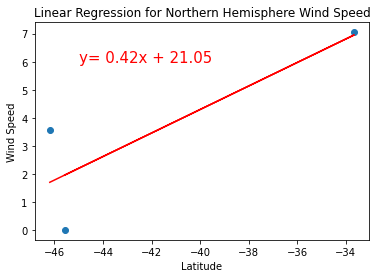

In [78]:
# Run Southern Hemisphere linear regression for Cloudiness
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Linear Regression for Northern Hemisphere Wind Speed", "Wind Speed", (-45,6))